## .引入依赖

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 从sklearn中直接生成聚类数据
from sklearn.datasets.samples_generator import make_blobs
# 引入scipy中的距离函数，默认欧式距离
from scipy.spatial.distance import cdist

## .数据加载

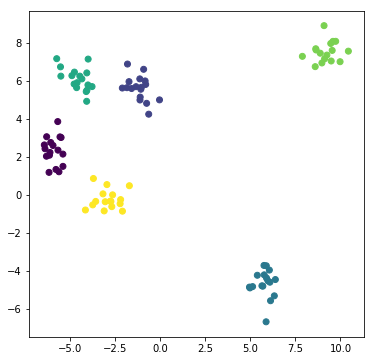

In [7]:
x, y = make_blobs(n_samples=100, centers=6, random_state=1234, cluster_std=0.6)

plt.figure(figsize=(6, 6))
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

## .算法实现

In [14]:
class K_means(object):
    # 初始化，参数n_cluster(K)、迭代次数 max_iter、初始质心 centroids
    def __init__(self, n_clusters=6, max_iter=300, centroids=[]):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = np.array(centroids, dtype=np.float)
        
        
    # 训练模型方法，k-means聚类过程，传入原始数据
    def fit(self, data):
        # 假如没有指定初始质心，就随机选取data中的点作为初始质心
        if(self.centroids.shape == (0,)):
            # 从data中随机生成0到 data 行数的6个整数，作为索引值
            self.centroids = data[np.random.randint(0, data.shape[0], self.n_clusters), :]
            
        # 开始迭代
        for i in range(self.max_iter):
            # 1.计算距离矩阵，得到一个100 * 6的矩阵
            distances = cdist(data, self.centroids)
            
            # 2.对距离按由近到远排序，选取最近的质心点的类别，作为当前的分类
            c_ind = np.argmin(distances, axis=1)
            
            # 3.对每一类数据进行均值计算，更新质心点坐标
            for i in range(self.n_clusters):
                # 排除掉没有出现在c_ind里的类别
                if i in c_ind:
                    # 选出所有类别是i的点，取data里面坐标的均值，更新第i个质心
                    self.centroids[i] = np.mean(data[c_ind==i], axis=0)
                    
    # 预测方法
    def predict(self, samples):
        # 和上面一样，先计算距离矩阵，然后选取距离最近的那个质心的类别
        distances = cdist(samples, self.centroids)
        c_ind = np.argmin(distances, axis=1)

        return c_ind
            

## .测试

[[ 5.76444812 -4.67941789]
 [-2.89174024 -0.22808556]
 [-5.89115978  2.33887408]
 [-4.53406813  6.11523454]
 [-1.15698106  5.63230377]
 [ 9.20551979  7.56124841]]
[4 5]


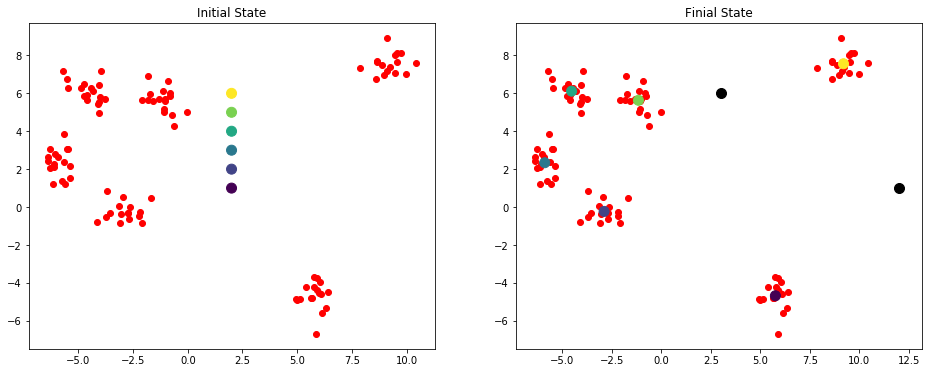

In [17]:
def plot_Kmeans(x, y, centroids, subplot, title):
    # 分配子图
    plt.subplot(subplot)
    plt.scatter(x[:,0], x[:,1], c='r')
    # 画出质心点
    plt.scatter(centroids[:,0], centroids[:,1], c=np.array(range(6)), s=100)
    plt.title(title)
    
    
kmeans = K_means(max_iter=300, centroids=np.array([[2,1], [2,2], [2,3], [2,4],[2,5], [2,6]]))

plt.figure(figsize=(16, 6))
plot_Kmeans(x, y, kmeans.centroids, 121, 'Initial State')

# 开始聚类
kmeans.fit(x)

plot_Kmeans(x, y, kmeans.centroids, 122, 'Finial State')

print(kmeans.centroids)
# 预测
news_points = np.array([[3,6], [12,1]])
y_pred = kmeans.predict(news_points)

print(y_pred)

plt.scatter(news_points[:,0], news_points[:,1], s=100, c='black')